In [22]:
import warnings
import numpy as np  
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
warnings.filterwarnings('ignore') 

df = pd.read_csv('earthquake_alert_balanced_dataset.csv') 
df

,magnitude,depth,cdi,mmi,sig,alert
0,7.00,14.0,8.0,7.0,0.0,green
1,6.90,25.0,4.0,4.0,-33.0,green
2,7.00,579.0,3.0,3.0,-13.0,green
3,7.30,37.0,5.0,5.0,65.0,green
4,6.60,624.0,0.0,2.0,-98.0,green
...,...,...,...,...,...,...
1295,6.87,11.0,9.0,7.0,13.0,yellow
1296,7.85,93.0,8.0,6.0,-51.0,yellow
1297,7.48,142.0,7.0,6.0,120.0,yellow
1298,7.04,51.0,7.0,6.0,-115.0,yellow


In [13]:
df.shape

(1300, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


In [15]:
df.describe()

,magnitude,depth,cdi,mmi,sig
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,7.061008,50.321538,6.976154,6.939231,-9.749231
std,0.423738,104.348286,2.244875,1.354774,62.245214
min,6.500000,2.000000,0.000000,1.000000,-128.000000
25%,6.700000,12.000000,6.000000,6.000000,-54.000000
50%,7.000000,19.000000,8.000000,7.000000,-7.000000
75%,7.300000,38.000000,8.000000,8.000000,31.000000
max,8.600000,670.000000,9.000000,9.000000,127.000000


In [16]:
df.isnull().sum()

magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64

<Axes: xlabel='alert', ylabel='count'>

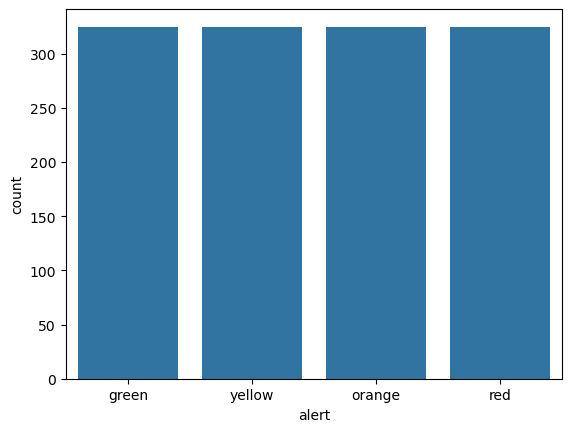

In [17]:
sns.countplot(x= df['alert'])

In [18]:
df.head(1)

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green


In [25]:
cols_for_scale = ['magnitude', 'depth', 'cdi', 'mmi','sig'] 

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder() 
df['alert'] = le.fit_transform(df['alert']) 
df

,magnitude,depth,cdi,mmi,sig,alert
0,7.00,14.0,8.0,7.0,0.0,0
1,6.90,25.0,4.0,4.0,-33.0,0
2,7.00,579.0,3.0,3.0,-13.0,0
3,7.30,37.0,5.0,5.0,65.0,0
4,6.60,624.0,0.0,2.0,-98.0,0
...,...,...,...,...,...,...
1295,6.87,11.0,9.0,7.0,13.0,3
1296,7.85,93.0,8.0,6.0,-51.0,3
1297,7.48,142.0,7.0,6.0,120.0,3
1298,7.04,51.0,7.0,6.0,-115.0,3


In [27]:
scale = StandardScaler()
df[cols_for_scale] = scale.fit_transform(df[cols_for_scale]) 
df

,magnitude,depth,cdi,mmi,sig,alert
0,-0.144031,-0.348214,0.456257,0.044873,0.156686,0
1,-0.380116,-0.242757,-1.326265,-2.170372,-0.373679,0
2,-0.144031,5.068429,-1.771896,-2.908786,-0.052245,0
3,0.564227,-0.127713,-0.880635,-1.431957,1.201345,0
4,-1.088374,5.499843,-3.108788,-3.647201,-1.418338,0
...,...,...,...,...,...,...
1295,-0.450942,-0.376975,0.901888,0.044873,0.365618,3
1296,1.862699,0.409158,0.456257,-0.693542,-0.662969,3
1297,0.989182,0.878919,0.010627,-0.693542,2.085287,3
1298,-0.049596,0.006504,0.010627,-0.693542,-1.691556,3


In [28]:
X = df.drop(['alert'], axis= 1) 
y = df['alert'] 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [30]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

base_models = [
    ('dt', DecisionTreeClassifier(random_state= 42)),   
    ('nb', GaussianNB()), 
    ('n_neighbours', KNeighborsClassifier(n_neighbors= 3)),   
    ('svm', SVC(kernel= 'rbf'))
]

meta_models = LogisticRegression()    

model = StackingClassifier(
    estimators= base_models, final_estimator= meta_models
)

model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
result = pd.DataFrame({
    "Real": y_test, "Predicted": y_pred
}) 
result

,Real,Predicted
478,1,1
721,2,2
312,0,0
660,1,1
823,2,2
...,...,...
306,0,0
199,3,3
296,0,0
286,0,0


In [31]:
print("Training Accuracy:", model.score(X_train, y_train)) 
print("Testing Accuracy:", model.score(X_test, y_test))

Training Accuracy: 0.9673076923076923
Testing Accuracy: 0.9076923076923077


In [32]:
from sklearn.model_selection import cross_val_score 

score = cross_val_score(model, X, y, cv= 5) 
score.mean()

np.float64(0.8846153846153847)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[55  6  0  7]
 [ 0 68  2  3]
 [ 0  3 61  0]
 [ 3  0  0 52]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.87        68
           1       0.88      0.93      0.91        73
           2       0.97      0.95      0.96        64
           3       0.84      0.95      0.89        55

    accuracy                           0.91       260
   macro avg       0.91      0.91      0.91       260
weighted avg       0.91      0.91      0.91       260



In [35]:
import joblib 
joblib.dump(model, 'model.pkl')
joblib.dump(scale, 'scaling.pkl') 
joblib.dump(le, 'encoding.pkl')

['encoding.pkl']